In [5]:
from math import cos, asin, sqrt

from lightgbm import LGBMRegressor
from multiprocessing import Pool
from tqdm import tqdm
from pypolyline.util import encode_coordinates, decode_polyline
from math import acos, degrees


def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v[0],v[1],p[0],p[1]))

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import fbeta_score, make_scorer
import pandas as pd
import numpy as np

score = make_scorer(mape, greater_is_better=False)

def perform_parallel(data,
                     function,
                     n_jobs: int,
                     verbose: bool = False):

    with Pool(n_jobs) as p:
        chunksize = max(1, len(data) // n_jobs)

        result = list(tqdm(p.imap(function, data, chunksize=chunksize),
                           disable=not verbose,
                           total=len(data)))
    return result


def find_angle(x,y,z):
    
    is_triangle = (x + y > z) and (y + z > x) and (z + x > y) and (x > 0) and (y > 0) and (z > 0)
    if is_triangle:
        return degrees(acos((y * y + x * x - z * z)/(2.0 * (x * y))))
    else:
        return -360
        
default_route = {}
default_route[1078] = 'gnvsIaq{jHChA??uC???OPG^F^NRzKBd@AN[r@???`@`@`@F??D~@CrT??gAEeGB??A`I??cAB???`CC\\'
default_route[22390] = 'sxrcIqpjqHb@????]??hA@??PxP??JlGFbF??kG`@qFC??NfPL|KH|KPfMFxIDtCFvKClAIv@Op@c@tAk@z@aFjF_@Ta@N_FLo@?{BJYO??AxAGtBGdAIdAw@bFWhAy@hCu@nBkChHmH`T??qByB??Fq@n@aC??ZF`@^V\\'
default_route[22430] = '}qoyHeezwGjDuVLcAVkBDa@??aEqBo@_@gB}@??nAmIjAoHhAaI`BsKn@wE??wBmA??Gj@ZROhAYM'
default_route[22438] = 'sd~`JenavIJnAGTHt@??c@Ny@`@uBv@k@Rw@N[Ao@Uc@?uAYuCM}A^gBx@mBVq@L_Fn@_@Hy@HqGF??hAbLBzAC|AW~FOzJa@lLc@dJWbEWrB??QUSEa@J]b@Yl@]`AoBlG_Af@??_AoLq@eH'

    
# Скраулили с яндекса
def traffick_jam(weekend, hour,main_id_locality):
    #Начало дня во всех регионах 
    if weekend==0 and (0 <= hour <= 3):
        traffick_jam=0
    #Самара 
    elif weekend==0 and main_id_locality == 22390 and hour == 4:
        traffick_jam=0
    elif weekend==0 and main_id_locality == 22390 and hour == 5:
        traffick_jam=0.5
    elif weekend==0 and main_id_locality == 22390 and (hour == 6 or hour == 22):
        traffick_jam=1
    elif weekend==0 and main_id_locality == 22390 and  hour == 23:
        traffick_jam=0.8
    elif weekend==0 and main_id_locality == 22390 and  hour == 21:
        traffick_jam=1.5
    elif weekend==0 and main_id_locality == 22390 and  (hour == 20 or hour == 7):
        traffick_jam=2.5
    elif weekend==0 and main_id_locality == 22390 and  hour == 8:
        traffick_jam=5.5
    elif weekend==0 and main_id_locality == 22390 and  hour == 9:
        traffick_jam=6
    elif weekend==0 and main_id_locality == 22390 and  (10 <= hour <= 14):
        traffick_jam=3.8
    elif weekend==0 and main_id_locality == 22390 and  (15 <= hour <= 16):
        traffick_jam=4
    elif weekend==0 and main_id_locality == 22390 and   hour == 17:
        traffick_jam=4.3
    elif weekend==0 and main_id_locality == 22390 and   hour == 19:
        traffick_jam=6.3
    elif weekend==0 and main_id_locality == 22390 and   hour == 18:
        traffick_jam=6.5
    #Пермь и Саратов
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 4:
        traffick_jam=0
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430) and (5 <= hour <= 6):
        traffick_jam=0.5
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430) and (22 <= hour <= 23 or hour==7):
        traffick_jam=1
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 8:
        traffick_jam=3.5
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 9:
        traffick_jam=5.2
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430) and (hour==12 or hour==10 or hour==20):
        traffick_jam=3
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 11:
        traffick_jam=2.9
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 13:
        traffick_jam=3.2
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 14:
        traffick_jam=3.3
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 15:
        traffick_jam=3.6
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 16:
        traffick_jam=3.8
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 17:
        traffick_jam=4
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 18:
        traffick_jam=5.8
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 19:
        traffick_jam=6
    elif weekend==0 and (main_id_locality == 22438 or main_id_locality == 22430)  and hour == 21:
        traffick_jam=2
    #Казань 
    elif weekend==0 and main_id_locality == 1078 and hour == 4:
        traffick_jam=1
    elif weekend==0 and main_id_locality == 1078 and hour == 5:
        traffick_jam=1.5
    elif weekend==0 and main_id_locality == 1078 and hour == 6:
        traffick_jam=1.7
    elif weekend==0 and main_id_locality == 1078 and hour == 7:
        traffick_jam=2.2
    elif weekend==0 and main_id_locality == 1078 and hour == 8:
        traffick_jam=4.4
    elif weekend==0 and main_id_locality == 1078 and hour == 9:
        traffick_jam=3.5
    elif weekend==0 and main_id_locality == 1078 and  (10 <= hour <= 14):
        traffick_jam=2.5
    elif weekend==0 and main_id_locality == 1078 and hour == 15:
        traffick_jam=2.7
    elif weekend==0 and main_id_locality == 1078 and hour == 16:
        traffick_jam=2.9
    elif weekend==0 and main_id_locality == 1078 and hour == 17:
        traffick_jam=3
    elif weekend==0 and main_id_locality == 1078 and hour == 18:
        traffick_jam=5.5
    elif weekend==0 and main_id_locality == 1078 and hour == 19:
        traffick_jam=5
    elif weekend==0 and main_id_locality == 1078 and hour == 20:
        traffick_jam=2
    elif weekend==0 and main_id_locality == 1078 and hour == 21:
        traffick_jam=1.2
    elif weekend==0 and main_id_locality == 1078 and hour == 22:
        traffick_jam=1
    elif weekend==0 and main_id_locality == 1078 and hour == 23:
        traffick_jam=0.5  
    #Выходные 
    elif weekend==1 and (0 <= hour <= 5 or  hour ==  23):
        traffick_jam=0
    elif weekend==1 and ( hour == 21 or  hour ==  6 or  hour ==  20):
        traffick_jam=0.5
    elif weekend==1 and ( hour == 22):
        traffick_jam=0.3
    elif weekend==1 and ( hour == 19 or  hour ==  7):
        traffick_jam=0.8
    elif weekend==1 and ( hour == 18 or  hour ==  8):
        traffick_jam=1
    elif weekend==1 and ( hour == 17 or  hour ==  10 or  hour ==  9):
        traffick_jam=1.3
    elif weekend==1 and ( hour == 11 or  hour ==  16):
        traffick_jam=1.5
    elif weekend==1 and ( hour == 12 or  hour == 13 or  hour ==  15):
        traffick_jam=1.8
    elif weekend==1 and  hour == 14:
        traffick_jam=2
    else:
        traffick_jam = 0   
    return traffick_jam


def turn_detect(x,y):
    
    if x[0] >= 0 and x[1] >= 0:
        fst_quat = 1
    elif x[1] >= 0 and x[0] < 0:
        fst_quat = 2
    elif x[1] < 0 and x[0] < 0:
        fst_quat = 3
    else:
        fst_quat = 4
        
    if x[0] >= 0 and x[1] >= 0:
        snd_quat = 1
    elif x[1] >= 0 and x[0] < 0:
        snd_quat = 2
    elif x[1] < 0 and x[0] < 0:
        snd_quat = 3
    else:
        snd_quat = 4
        
    tg1 = x[1] / (x[0]+1e-10)
    tg2 = y[1] / (y[0]+1e-10)
        
    if fst_quat == 1 and snd_quat == 1: return int(tg2 < tg1)
    elif fst_quat == 1 and snd_quat == 2: return 0
    elif fst_quat == 1 and snd_quat == 3: return 0
    elif fst_quat == 1 and snd_quat == 4: return 1
    elif fst_quat == 2 and snd_quat == 1: return 1
    elif fst_quat == 2 and snd_quat == 2: return int(tg2 > tg1)
    elif fst_quat == 2 and snd_quat == 3: return 0
    elif fst_quat == 2 and snd_quat == 4: return 0
    elif fst_quat == 3 and snd_quat == 1: return 1
    elif fst_quat == 3 and snd_quat == 2: return 1
    elif fst_quat == 3 and snd_quat == 3: return int(tg2 < tg1)
    elif fst_quat == 3 and snd_quat == 4: return 0
    elif fst_quat == 4 and snd_quat == 1: return 0
    elif fst_quat == 4 and snd_quat == 2: return 1
    elif fst_quat == 4 and snd_quat == 3: return 1
    elif fst_quat == 4 and snd_quat == 4: return int(tg2 > tg1)
    
    
    
def bearing_degree(lat1, lng1, lat2, lng2):
    '''
    calculate angle between two points
    '''
    radius = 6371  # Mean radius of Earth
    diff_lng = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(diff_lng) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(diff_lng)
    return np.degrees(np.arctan2(y, x))

def manhattan_dist(lat1, lng1, lat2, lng2):
    '''
    calculating two haversine distances by,
     - avoiding Latitude of one point 
     - avoiding Longitude of one point
    and adding it together.
    '''
    a = distance(lat1, lng1, lat1, lng2)
    b = distance(lat1, lng1, lat2, lng1)
    return a + b

In [2]:
airoports = {}
airoports[1078] = [55.609125, 49.302618]
airoports[22390] = [53.512261,50.157673]
airoports[22438] = [57.916118,56.010467]
airoports[22430] = [51.558255,46.030986]

rways = {}

rways[1078] = [55.790530, 49.101587]
rways[22390] = [53.185806,50.121331]
rways[22438] = [58.004816,56.182671]
rways[22430] = [51.542003,46.000976]



In [164]:


train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_additional.csv')

validation_df = pd.read_csv('validation.csv')

train_df = train_df[~train_df.route.isna()]
validation_df = validation_df[~validation_df.route.isna()]

train_df.head()

,Id,main_id_locality,ETA,RTA,OrderedDate,latitude,del_latitude,longitude,del_longitude,EDA,...,GoodArrived,ready_latitude,ready_longitude,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude,route
0,0,1078,226.0,188.0,2020-02-12 19:12:06,55.826019,55.825581,49.134529,49.126949,1.0,...,2020-02-12 19:18:14,55.825647,49.134115,55.826261,49.134137,55.825706,49.127136,55.794388,49.111531,gnvsIaq{jHChA??uC???OPG^F^NRzKBd@AN[r@???`@`@`...
1,1,1078,718.0,725.0,2020-02-12 19:12:22,55.795502,55.820911,49.131470,49.115360,5.0,...,2020-02-12 19:31:47,55.795591,49.132281,55.795544,49.131552,55.821531,49.115685,55.794388,49.111531,sqpsI}~zjHyAr]e@lMk@fLaBlb@i@rLKhBCdAUxEGlCg@f...
2,2,1078,612.0,764.0,2020-02-12 19:12:44,55.791050,55.819962,49.226070,49.176628,5.0,...,2020-02-12 19:28:09,55.791099,49.226066,55.791099,49.226066,55.819765,49.177432,55.794388,49.111531,auosI}mmkH?LHd@KhC??o@w@[g@m@iAUk@??{G|OiB`Ek@...
3,3,1078,1560.0,1412.0,2020-02-12 19:12:44,55.753899,55.824680,49.188519,49.093700,13.0,...,2020-02-12 19:42:41,55.754116,49.188853,55.754116,49.188853,55.824734,49.094013,55.794388,49.111531,{lhsIiffkHmKN_C?mIPwMJ??Si@gA{B??Wq@MRCJTp@hAd...
4,4,1078,1528.0,893.0,2020-02-12 19:12:45,55.822361,55.786758,49.069092,49.143501,9.0,...,2020-02-12 19:32:19,55.822483,49.069659,55.822617,49.069229,55.786936,49.143330,55.794388,49.111531,yxusI{xnjHgAfG??}IuHkAqA??pIoe@VsA??dAkG`BuH??...


## Обучим кластеризацию

In [166]:
copy = train_df[:100000].copy()
copy['points'] = copy.route.apply(lambda x: decode_polyline(x.encode(),5))

coords = []
for route in copy['points']:
    coords.extend(route[::15])
    
    
from sklearn.cluster import DBSCAN,KMeans

cluster = KMeans(n_clusters=100)

cluster.fit(coords)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Перпроцессинг данных

Дальше основной класс, который генерирует признаки для датафрейма

In [219]:
class Preprocessor:
    
    def __init__(self):
        pass
        
    def process_df(self, df: pd.DataFrame,full=False) -> pd.DataFrame:
       
        
        self.ci = {v:k for k,v in enumerate(df.columns)}
        
        if not full: df = df[:20000] # чтобы тестить
        data = self.process_rows(df)
        data = pd.DataFrame(data)

        return data
    
    def process_rows(self, dataset: pd.Series):

        return perform_parallel(
            data=dataset.values,
            function=self._process_row,
            n_jobs=8
        )

    def _process_row(self, val: pd.Series) -> dict:

        y = val
        row = {}
        
        # Просто вернем некоторые колонки
        row['ETA'] = y[self.ci['ETA']]    
        row['EDA'] = y[self.ci['EDA']]
        row['Id'] = y[self.ci['Id']]
        
        # Получим дату заказа
        date =  pd.to_datetime(y[self.ci['OrderedDate']])
        
        # Город
        main_id_locality = y[self.ci['main_id_locality']]
        
        # Город можно однозначно декодировать, учтем часовой пояс
        
        if main_id_locality == 22390 or main_id_locality == 22430: date += pd.DateOffset(hours=1)
        if main_id_locality == 22438: date += pd.DateOffset(hours=2)
        if main_id_locality == 22402 or main_id_locality == 22406: date += pd.DateOffset(hours=2)
        if main_id_locality == 22394: date += pd.DateOffset(hours=1)
            
        # Закодируем гороод от 0 до 3
        row['id_city'] = [22390,22430,1078,22438].index(main_id_locality)
        
        # Выделим час. От этого зависят пробки
        hour = date.hour
        row['hour'] = hour
        
        # День недели
        weekday = date.weekday()
        row['weekday'] = weekday
        
        # Признак выходного
        weekend = int(weekday >= 5)
        row['weekend'] = weekend
        
        # Кое-где нет маршрута. В тесте - 25 элементов, заменим их на дефолтные для
        # соответствующего города. В трейне и валидации null мы выкинули
        if pd.isnull(y[self.ci['route']]):
            route = np.array(decode_polyline(default_route[main_id_locality].encode(),5))
        else:
            route = np.array(decode_polyline(y[self.ci['route']].encode(),5))
        
        # Данные о пробках в конкретном городе, конкретный день
        row['traffic_jam'] = traffick_jam(weekend,hour,main_id_locality)
        
        # Координаты начала/конца заказа/центра
        x_long = y[self.ci['longitude']]
        y_long = y[self.ci['del_longitude']]
        x_lat = y[self.ci['latitude']]
        y_lat = y[self.ci['longitude']]
        center_long = y[self.ci['center_longitude']]
        center_lat = y[self.ci['center_latitude']]
        
        # Всевозможные расстояния между тремя точками
        row['dist_xy'] = a = distance(x_lat,x_long,y_lat,y_long)
        row['dist_xc'] = b = distance(x_lat,x_long,center_lat,center_long)
        row['dist_yc'] = c = distance(y_lat,y_long,center_lat,center_long)
        
        
        # По предыдущим 3 расстояним соствами треугольник
        # Проведем высоту от центра на основание
        p2 = (a + b + c) / 2    
        h = 2 * np.sqrt(p2 * (p2 - a) * (p2 - b) * (p2 - c)) / a
        row['h'] = h 
            
        # Теперь посчитаем расстояния между началом заказа и первой точкой маршрута
        row['dist_x_get'] = distance(x_lat,x_long,route[0][0],route[0][1])
        
        # Аналогично между целью и конечной точкой маршрута
        row['dist_y_out'] = distance(y_lat,y_long,route[-1][0],route[-1][1])
        
        # Количество точек в маршруте
        row['num_of_points'] = route.shape[0]
        
        # Посчитаем попарные расстояния между соседними координатами маршрута
        distances = np.array([distance(x[0],x[1],y[0],y[1]) for x,y in zip(route[1:],route[:-1])])
        
        # Некоторые очевидные агрегации по предыдущей переменной
        row['points_mean'] = distances.mean()
        row['points_std'] = distances.std()
        row['sum_minus_eda'] = distances.sum() - row['EDA'] # не еда, но EDA
        row['eda_poinst'] = row['EDA'] / (distances.shape[0] + 1e-12)
        row['zero_distance'] = distances[distances == 0].shape[0]
        
        # Сразу посчитаем скорость
        row['speed'] = y[self.ci['EDA']] / (y[self.ci['ETA']]/60)
        
        # И дельту средней скорости, рассчитанной по разным расстояниям
        row['diff_speed'] = row['sum_minus_eda']/ (y[self.ci['ETA']]/60)
        
        # Посмотрим, насколько близко маршрут к центру города
        distances_to_center = np.array(
            [distance(center_lat,center_long,x[0],x[1]) for x in route])
        
        # В среднем, и какая дисперсия
        row['points_mean_center'] = distances_to_center.mean()
        row['points_std_center'] = distances_to_center.std()
        
        # Посмотрим, сколько точек маршрута лежат вблилизи центра
        row['dist_1km'] = distances_to_center[distances_to_center < 1].shape[0]
        row['dist_3km'] = distances_to_center[distances_to_center < 3].shape[0]
        row['dist_5km'] = distances_to_center[distances_to_center < 5].shape[0]
        row['dist_10km'] = distances_to_center[distances_to_center < 10].shape[0]
        
        # Сделаем эти величины относительными
        row['dist_1km'] /= distances_to_center.shape[0]
        row['dist_3km'] /= distances_to_center.shape[0]
        row['dist_5km'] /= distances_to_center.shape[0]
        row['dist_10km'] /= distances_to_center.shape[0]
        
        
        # Теперь составим треугольники по маршруту. Для двух соседних точек маршрутка
        # (x,y,z), стороны треугольника
        distances1 = np.array(
            [[x,y,z] for x,y,z in zip(route[:-2],route[1:-1],route[2:])])

        trinagles = [[distance(x[0],x[1],y[0],y[1]),\
                     distance(y[0],y[1],z[0],z[1]),\
                     distance(z[0],z[1],x[0],x[1])] for x,y,z in distances1]

        trinagles = [[x,y,z] for x,y,z in trinagles if (x * y * z) != 0]
        
        trinagles = np.array([find_angle(x,y,z)  for x,y,z in trinagles])
        trinagles[trinagles != -360]
        
        row['angle_mean'] = trinagles.mean() if trinagles.shape[0] != 0 else 0
        row['angle_std'] = trinagles.std() if trinagles.shape[0] != 0 else 0
        row['dummy_model'] = np.sum([np.sqrt(2000 * x / 3) for x in distances])
        
        diff = np.array([[y[0] - x[0],y[1] - x[1]] for x,y in zip(route[1:],route[:-1])])

        diff = np.array([turn_detect(x,y) for x,y in zip(diff[1:],diff[:-1])])
        row['left_general'] =  diff[diff==0].shape[0]/(diff.shape[0]+1)
    #    row['left_right'] = diff[diff==0].shape[0]/(diff[diff==1].shape[0]+1)
        
        aeroport_coords = airoports[main_id_locality]
        distances_to_aeroport = np.array(
            [distance(aeroport_coords[0],aeroport_coords[1],x[0],x[1]) for x in route])
        
        row['aero_min'] = distances_to_aeroport.min()
        
        
        
        aeroport_coords = rways[main_id_locality]
        distances_to_aeroport = np.array(
            [distance(aeroport_coords[0],aeroport_coords[1],x[0],x[1]) for x in route])
        
        row['rw_min'] = distances_to_aeroport.min()
        row['cluster'] = np.unique(np.array(cluster.predict(route))).shape[0]
        
        degress = np.array([bearing_degree(x[0],x[1],y[0],y[1]) for x,y in zip(route[1:],route[:-1])])
        
        row['mean_degree'] = degress.mean()
        row['std_degree'] = degress.std()
        row['min_degree'] = degress.max()
        row['max_degree'] = degress.min()
        
        left = degress[degress > 90].shape[0]
        right = degress[degress > 90].shape[0]
        
        row['left_right_norm'] = left / (right + 1)
        row['left_general_norm'] = left / degress.shape[0]
    
        manth_dist = np.array([manhattan_dist(x[0],x[1],y[0],y[1]) for x,y in zip(route[1:],route[:-1])])
        
        row['manth_dist_mean'] = manth_dist.mean()
        row['manth_dist_std'] = manth_dist.std()
        
        # Таргет, если это не тестовая выборка
        if 'RTA' in self.ci:
            row['RTA'] = y[self.ci['RTA']]

        return row

In [220]:
pr = Preprocessor()
train_df_pr = pr.process_df(train_df,True)
print('train is ready')
validation_df_pr = pr.process_df(validation_df,True)
print('validation is ready')
test_df_pr = pr.process_df(test_df,True)
print('test is ready')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in sqrt


train is ready
validation is ready
test is ready


In [6]:
train_df_pr = pd.read_csv('train_df_pr.csv')
validation_df_pr = pd.read_csv('validation_df_pr.csv')
test_df_pr = pd.read_csv('test_df_pr.csv')

#train_df_pr.to_csv('train_df_pr.csv',index=None)
#validation_df_pr.to_csv('validation_df_pr.csv',index=None)
#test_df_pr.to_csv('test_df_pr.csv',index=None)

In [21]:
FEATURES = ['hour',
            'weekday',
           # 'weekend',
            'dist_xy',
            'dist_xc',
            'dist_yc',
            'EDA',
            'ETA',
            'h',
            'num_of_points',
            'points_mean',
            'points_std',
            'sum_minus_eda',
            'zero_distance',
            'points_mean_center',
            'points_std_center',
            'eda_poinst',
            'speed',
            'dist_1km',
            'dist_3km',
            'dist_5km',
            'dist_10km',
            'angle_mean',
            'angle_std',
            'traffic_jam',
          #  'id_city',
            'left_general',
            #'left_right',
            'dummy_model',
            'aero_min',
            'rw_min',
            'diff_speed',
            'cluster',
            'mean_degree',
            'std_degree',
            'min_degree',
            'left_right_norm',
            'max_degree',
            'left_general_norm',
            'manth_dist_mean',
            'manth_dist_std',
            'dist_x_get',
            'dist_y_out'
           ]

In [22]:
parameters2 = {
  #  'application': 'binary',
    'objective': 'mape',
    'metric': 'mape',
    'learning_rate': 0.01,
    "bagging_freq": 3,
    "bagging_fraction": 0.8,
    "min_data_in_leaf": 30,
    "min_sum_hessian_in_leaf": 5,
    "use_two_round_loading": False,
    "feature_fraction": 0.8,
    'verbose': 1,
    "num_threads": 30,
    "lambda_l1": 0.1,
    "n_estimators": 300,
    'random_state':23,
}

parameters3 = {
'bagging_fraction': 0.5,
 'bagging_freq': 1,
 'colsample_bytree': 0.7756038066515227,
 'feature_fraction': 1,
 'lambda_l1': 0.1,
 'learning_rate': 0.1,
 'min_child_samples': 188,
 'min_child_weight': 1e-05,
 'min_data_in_leaf': 30,
 'min_sum_hessian_in_leaf': 5,
 'n_estimators': 2000,
 'num_leaves': 41,
 'reg_alpha': 5,
 'reg_lambda': 0,
 'subsample': 0.7417643168023591}


bst3 = LGBMRegressor(**parameters2)

bst3.fit(train_df_pr[FEATURES],train_df_pr['RTA'])
#bst3.fit(to_fit,target_fit)

mape(bst3.predict(validation_df_pr[FEATURES]),validation_df_pr['RTA'])

16.900451841417322

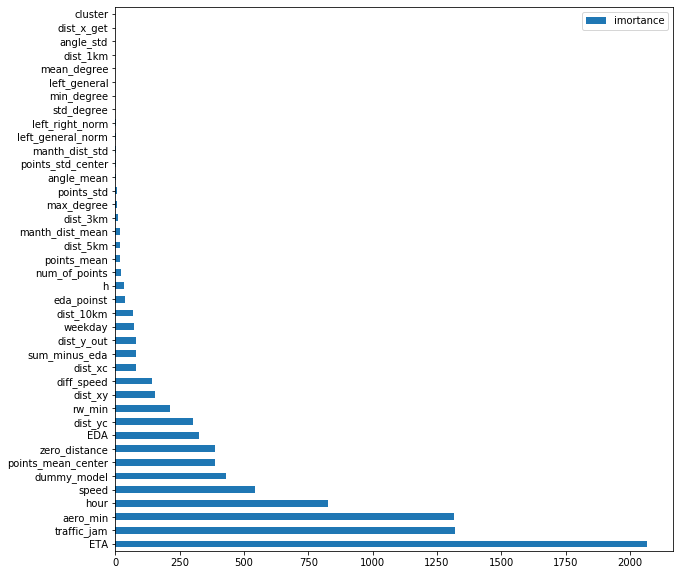

In [23]:
%matplotlib inline
importance_lgb = pd.DataFrame(bst3.feature_importances_,
                              index=FEATURES,
                              columns=['imortance']).sort_values(['imortance'],
                                                                 ascending=False)
importance_lgb
importance_lgb.plot(kind='barh', figsize=(10, 10))

In [230]:
test_df_pr['Prediction'] = bst3.predict(test_df_pr[FEATURES])
test_df_pr[['Id','Prediction']].to_csv('baseline.csv',index=None)

## Перебор параметров

In [ ]:


import lightgbm as lgb

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'mape', 
            "eval_set" : [(validation_df_pr[FEATURES],validation_df_pr['RTA'])],
            'eval_names': ['valid'],
            'verbose':[200]
            }

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': [49],
             'min_child_samples': [191], 
             'min_child_weight': [100],
             'subsample': [0.6], 
             'colsample_bytree': [0.64],
             'reg_alpha': [2],
             'reg_lambda': [0.1],
           #  'n_estimators': [50,100,150,200,250,350],
             'lambda_l1':[1e-1],
             'feature_fraction':[0.4],
             'min_sum_hessian_in_leaf':[7],
             'min_data_in_leaf':[20],
             'bagging_fraction':[0.9],
             'bagging_freq':[1],
             'learning_rate':[1e-1]}
             

n_HP_points_to_test = 1

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMRegressor(max_depth=-1,
                        random_state=13,
                        silent=True,
                        objective='mape',
                      #  boosting_type='dart',#goss rf
                        
                        metric='mape',
                        n_jobs=2,
                        n_estimators=400)

gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring=score,
    cv=3,
    refit=True,
    random_state=143,
    
    verbose=True)

gs.fit(train_df_pr[FEATURES], train_df_pr['RTA'], **fit_params)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds


In [18]:
test_df_pr['Prediction'] = gs.best_estimator_.predict(test_df_pr[FEATURES])
test_df_pr[['Id','Prediction']].to_csv('baseline.csv',index=None)

In [144]:
gs.best_params_


{'bagging_fraction': 0.7,
 'bagging_freq': 1,
 'colsample_bytree': 0.5425247320209474,
 'feature_fraction': 0.6,
 'lambda_l1': 0.01,
 'learning_rate': 0.1,
 'min_child_samples': 253,
 'min_child_weight': 0.1,
 'min_data_in_leaf': 40,
 'min_sum_hessian_in_leaf': 9,
 'num_leaves': 8,
 'reg_alpha': 10,
 'reg_lambda': 20,
 'subsample': 0.7776145836135577}

## Trash

In [138]:

# Старая версия функции для пробок
def traffick_jam_(weekend, hour):

    if weekend==0 and (0 <= hour <= 4):
        traffick_jam=0
    elif weekend==0 and hour == 5:
        traffick_jam=1
    elif weekend==0 and (hour == 6 or hour == 23):
        traffick_jam=2
    elif weekend==0 and hour == 7:
        traffick_jam=4
    elif weekend==0 and (hour == 19 or hour == 8):
        traffick_jam=6
    elif weekend==0 and (hour==9.00 or hour==16.00):
        traffick_jam=5.5
    elif weekend==0 and (10 <= hour <= 15):
        traffick_jam=5
    elif weekend==0 and (hour == 17 or hour==20):
        traffick_jam=6.5
    elif weekend==0 and hour == 18:
        traffick_jam=7
    elif weekend==0 and hour == 21:
        traffick_jam=3
    elif weekend==0 and hour == 23:
        traffick_jam=2.5
    elif weekend==1 and (0 <= hour <= 9 or 19 <= hour <=  23):
        traffick_jam=0
    elif weekend==1 and (10 <= hour <= 18.00):
        traffick_jam=1
    else:
        traffick_jam = 0
        
        
    return traffick_jam

In [ ]:
from skopt import BayesSearchCV

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'mape', 
            "eval_set" : [(validation_df_pr[FEATURES],validation_df_pr['RTA'])],
            'eval_names': ['valid'],
            'verbose':[200]
            }

bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMRegressor(max_depth=-1,
                        random_state=13,
                        silent=True,
                        objective='mape',
                        metric='mape',
                        n_jobs=2,
                        n_estimators=5000),
    search_spaces = {
        'num_leaves': (6, 50),
        'min_child_samples': (100, 500),
        'min_child_weight': (1e-5, 1,,'log-uniform'),
        'subsample': (0., 1.,),
        'colsample_bytree': (0., 1.),
        'reg_alpha': (1e-5, 100.,'log-uniform'),
        'reg_lambda': (1e-5, 100.,'log-uniform'),
        'lambda_l1': (1e-5,1,'log-uniform'),
        'min_child_weight': (1e-5, 1,'log-uniform'),
        'feature_fraction': (0.2, 1.),
        'min_sum_hessian_in_leaf': (2,10),
        'min_data_in_leaf': (20,100),
        'bagging_fraction': (0.3, 0.9),
        'bagging_freq': (1,10),
        'learning_rate': (1e-5, 1e-2,'log-uniform'),        
    },    
    scoring = score,
    fit_params=fit_params,
    cv = 3,
    n_jobs = 1,
    n_iter = 50, 
    
    verbose = 1,
    refit = True,
    random_state = 13,
    
)


result = bayes_cv_tuner.fit(train_df_pr[FEATURES], train_df_pr['RTA'])
result

test_df_pr['Prediction'] = bayes_cv_tuner.best_estimator_.predict(test_df_pr[FEATURES])
test_df_pr[['Id','Prediction']].to_csv('baseline.csv',index=None)